<a href="https://colab.research.google.com/github/LViudez/UCM_Python/blob/main/practicas/practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3
* Puede resolver aquí los ejercicios abriendo una celda después de cada uno de los enunciados.  
* Por favor, documente la solución de los ejercicios añadiendo suficientes **comentarios** del programador que expliquen el código.

## Ejercicio 3.1. Trabajar con un DataSet
* Obtener un dataset, preferiblemente con datos financieros, actuariales, económicos o estadísticos.
* Crear un modelo de análisis de los datos, utilizando las librerías principales para el análisis de datos, por ejemplo:
    - NumPy
    - Pandas
    - Matplotlib

fatal: destination path 'UCM_Python' already exists and is not an empty directory.


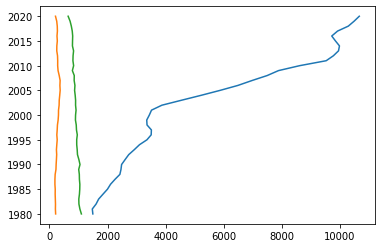

In [15]:
!git clone https://github.com/LViudez/UCM_Python.git

import pandas as pd
import matplotlib.pyplot as plt

path = 'UCM_Python/practicas/Dtos_temp_CO2.xlsx' # Ruta del archivo
Dc = pd.read_excel(path, sheet_name= 'Data') # Variable a la que hemos asociado el DataFrame para luego tratarla

Dc.head()

eje_x= []

#ax.plot(dias, temperaturas['Madrid'], linestyle = 'dashed')


plt.plot(Dc['China'],Dc['Años'])
plt.plot(Dc['Spain'],Dc['Años'])
plt.plot(Dc['Germany'],Dc['Años'])
plt.show()



## Ejercicio 3.2. Gráfico histórico de un índice o valor bursátil
* Descargar un archivo con formato ***csv*** de la página de Yahoo Finanzas con la cotización de:
 - un índice (IBEX, NASDAQ, ...) o
 - valor bursátil,
* o bien, de otra fuente disponible.
* Crear un procedimiento que lea el fichero y finalmente obtenga un gráfico del histórico del índice o valor.
* Tomar el periodo histórico más largo posible.
* Alternativamente o adicionalmente, si disponemos de una API o fuente de información diferente de un *csv* descargado de forma manual, también se podría realizar de una forma más automatizada.

In [ ]:
!git clone https://github.com/LViudez/UCM_Python.git
#%cd UCM_Python/practicas -- De esta forma también funcionaría, para ello, en path solo se pondría el nombre del archivo que queremos tratar

import pandas as pd
import plotly.graph_objects as go

path = 'UCM_Python/practicas/IAG.L.csv' # Ruta del archivo
Datos_Iberia = pd.read_csv(path, sep = ',') # Variable a la que hemos asociado el DataFrame para luego tratarla

#Construcción de un OLHC chart con promedio móvil exponencial

Datos_Iberia['EMA5'] = Datos_Iberia.Close.ewm(span = 5, adjust=False).mean() # Calculamos la media móvil exponencial de 5 días y se añada al DataFrame como una columna más llamada EMA5
Datos_Iberia['EMA20'] = Datos_Iberia.Close.ewm(span = 20, adjust=False).mean() # Calculamos la media móvil exponencial de 20 días y se añada al DataFrame como una columna más llamada EMA20


print(Datos_Iberia) # Mostramos el DataFrame

Graph = go.Figure(data=go.Ohlc(x=Datos_Iberia['Date'],    # Creamos el la gráfica OLHC (open, high, low and close)
                  open = Datos_Iberia['Open'],
                  high = Datos_Iberia['High'],
                  low = Datos_Iberia['Low'],
                  close = Datos_Iberia['Close'], name = "OHLC"))

Graph.add_scatter(x=Datos_Iberia.Date, y=Datos_Iberia.EMA5, line=dict(color='orange', width=1), name="EMA5")   # Añadimos a la gráfica OLHC la media móvil exponencial de 5 días
Graph.add_scatter(x=Datos_Iberia.Date, y=Datos_Iberia.EMA20, line=dict(color='green', width=1), name="EMA20")  # Añadimos a la gráfica OLHC la media móvil exponencial de 20 días

Graph.show() #Mostramos la gráfica, donde se aprecia la fuerte caída que tuvo Iberia causada por la pandemia.


## Ejercicio 3.3. Trabajar con la Librería openpyxl
* Crear una aplicación programada en Python que permita interactuar con la **hoja de cálculo** tanto para lectura, como para escritura.
* Utilice la Librería openpyxl, u otra que considere adecuada para interactuar con hoja de cálculo

In [ ]:
from openpyxl.workbook import workbook
!git clone https://github.com/LViudez/UCM_Python.git
%cd UCM_Python/practicas  #Nos conectamos a la carpeta donde tenemos el fichero que queremos

import os
os.getcwd() # para saber el directorio de trabajo actual

import openpyxl # importamos la librería openpyxl

wb=openpyxl.load_workbook('Facturas.xlsx') # wb es nuestro workbook "Facturas"


H_Factura = wb.sheetnames [0]     # Creamos una variable con el nombre de la hoja que queremos

ws1=wb[H_Factura]   # creamos la variable ws1 para recoger el objeto de la Facturas

#Creamos las hojas que nos serviran para dividir la muestra y los encabezados

ws2=wb.create_sheet(title="On_time")
ws3=wb.create_sheet(title="Out_of_time")

Encabezados = ['ID_Factura','Proveedor','Forma_pago','Fecha_cobro','Cuantia'] #Lista que contiene los nombres de los encabezados
n = 1 # Variable contadora

for i in Encabezados:
  ws2.cell(row=1,column=n, value=i)
  ws3.cell(row=1,column=n, value=i)
  n += 1

ws2.cell(row=1,column=6).value = "Nota"
ws3.cell(row=1,column=6).value = "Cuantía_Final"


mr = ws1.max_row #Calculamos el maximo de filas
mc = ws1.max_column #Calculamos el maximo de columnas

from datetime import date
from datetime import datetime

hoy = datetime.today()

f_ws2 = 2 # Contadoras para las filas de las dos nuevas hojas porque son filas diferentes a la hoja Facturas
f_ws3 = 2

for i in range (2, mr +1):                #Los que se han pasado de fecha, en la columna "Cuantía Final" de la hoja "Out_of_time" se indicará la cuantía más el recargo (que es los días que se han excedido por 0.1)
  F=ws1.cell(row=i,column=4).value  

  if hoy > F:
    res= (hoy-F).days
    for j in range (1, mc +1):
      ws3.cell(row=f_ws3,column=j).value = ws1.cell(row=i,column=j).value  # Se pasa toda la información de la factura, es decir, todas las columnas
    ws3.cell(row=f_ws3,column=mc + 1).value = ws1.cell(row=i,column=5).value * (1 + (res*0.1))
    f_ws3 += 1


  if hoy < F:                              #Los que no se han pasado de fecha, en la columna "Nota" de la hoja "On_time" se indicará los días que quedan para que paguen.
    res= (F-hoy).days
    for j in range (1, mc +1):
      ws2.cell(row=f_ws2,column=j).value = ws1.cell(row=i,column=j).value # Se pasa toda la información de la factura, es decir, todas las columnas
    ws2.cell(row=f_ws2,column=mc + 1).value = f'Le quedan {res} días para realizar el pago'

    f_ws2 += 1



# Para comprobar que todo va bien
for i in range (1,5):
    print(ws2.cell(row=i,column=1).value, 
          ws2.cell(row=i,column=2).value, 
          ws2.cell(row=i,column=3).value,
          ws2.cell(row=i,column=4).value,
          ws2.cell(row=i,column=5).value,
          ws2.cell(row=i,column=6).value)
print('='*30)
for i in range (1,5):
    print(ws3.cell(row=i,column=1).value, 
          ws3.cell(row=i,column=2).value, 
          ws3.cell(row=i,column=3).value,
          ws3.cell(row=i,column=4).value,
          ws3.cell(row=i,column=5).value,
          ws3.cell(row=i,column=6).value)

#Guardamos
wb.save('Fact_div.xlxs')


## Ejercicio 3.4. Librería actuarial
* Utilizando la librería actuarial **pyliferisk**, o cualquier otra que considere adecuada en este campo, cree un caso donde se muestren diferentes cálculos y procedimientos que se puedan realizar con ella.
* Alternativamente, puede realizar su propia librería actuarial y probarla creando ejemplos prácticos. En este caso, no olvide documentar la funcionalidad de los métodos que programe, utilizando POO.

## Ejercicio 3.5. Trabajar con una API
* Localizar una API con datos que puedan resultar de interés.
* Crear una aplicación programada en Python que utilice los datos de la API, preferiblemente con datos en tiempo real.
* Mostrar la información que nuestra aplicación pueda procesar, según ciertos filtros, que faciliten el uso de la API.

## Ejercicio 3.6. Página web con Flask
* Crear una aplicación de página web programada en Python con el framework Flask.
* Puede desplegarla en alguna plataforma gratuita como, por ejemplo, [Pythonanywhere](https://www.pythonanywhere.com) o [Heroku](https://www.heroku.com).

## Ejercicio 3.7. Bot de Telegram que proporciona cotizaciones en tiempo real
Crear un Bot de Telegram programado en Python que realizando **Web Scraping** nos pueda dar precios en tiempo real de valores cotizados en bolsa, o en mercados financieros internacionales.  
Adjuntar capturas de pantalla mostrando el funcionamiento del bot en Telegram.

## Ejercicio 3.8. Estrategias de Trading
* Elegir una compañía cotizada y realizar con ella diferentes estrategias de trading, con gráficos e indicadores bursátiles.
* Puede utilizar la librería TA-Lib u otro sistema para efectuar el análisis.

## Ejercicio 3.9. Finanzas
Estudie casos en el campo de las finanzas:
* VAN y TIR
* Cuadro de amortización de préstamos
* Operativa con activos de Renta Fija: bonos
* *Duration*
* Estructura Temporal de los Tipos de Interés (ETTI)
* Forwards sobre tipos de interés
* Arbitraje
* Random Walk en una y dos dimensiones
* ... / ...


## Ejercicio 3.10. Valoración de opciones financieras
* Método de valoración de opciones europeas mediante arbol binomial
* Método de Black-Scholes
* Convergencia de ambos métodos
* Gráfico de convergencia
* Arbitraje en caso de no cumplirse la paridad Put-Call